# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(Bsmall,1)

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

2.792e-6

#### Wersja ulepszona

In [5]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [6]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.013857375

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

3.456208125

In [11]:
@elapsed better_multiplication(A, B)

0.572870834

In [12]:
@elapsed A*B

0.016374625

### Wielomiany i aproksymacja średniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp
methods(exp)

# 14 methods for generic function "exp":
[1] exp(x::Union{Float16, Float32, Float64}) in Base.Math at special/exp.jl:326
[2] exp(A::StridedMatrix{var"#s886"} where var"#s886"<:Union{Float32, Float64, ComplexF32, ComplexF64}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:569
[3] exp(A::StridedMatrix{var"#s886"} where var"#s886"<:Union{Integer, Complex{<:Integer}}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:570
[4] exp(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/uniformscaling.jl:173
[5] exp(D::LinearAlgebra.Diagonal) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/diagonal.jl:674
[6] exp(A::LinearAlgebra.Hermitian{var"#s885", S} where {var"#s885"<:Complex, S<:(AbstractMatrix{<:var"#s885"})}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:731
[7] exp(A::Union{LinearAlgebra.Hermitian{var"#s886", S}, LinearAlgebra.Symmetric{var"#s886", S}} where {var"#s886"<:Real, S}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:727
[8] exp(A::LinearAlgebra.Transpose{<:Any, <:AbstractMatrix}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:572
[9] exp(A::LinearAlgebra.Adjoint{<:Any, <:AbstractMatrix}) in LinearAlgebra at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:571
[10] exp(::Missing) in Base.Math at math.jl:1374
[11] exp(x::BigFloat) in Base.MPFR at mpfr.jl:626
[12] exp(x::Real) in Base.Math at math.jl:1369
[13] exp(a::ComplexF16) in Base.Math at math.jl:1358
[14] exp(z::Complex) in Base at complex.jl:680

In [15]:
#import Pkg; 
#Pkg.add("Polynomials")

In [16]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490273 + 2905.5721994684877*x - 1082.7457238744707*x^2 + 100.44658880845455*x^3)

In [17]:
typeof(fit_poly_3)

Polynomial{Float64, :x}

In [18]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534441

In [19]:
using Plots

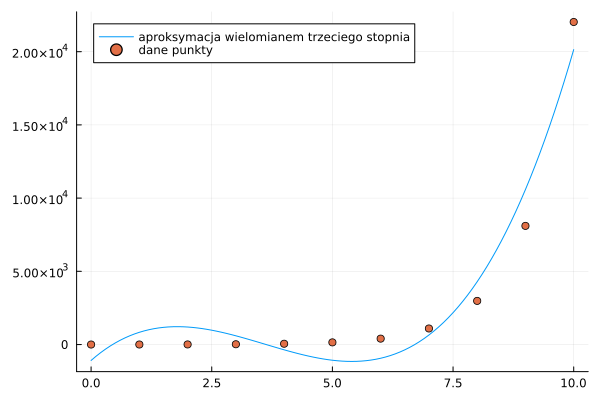

In [20]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [21]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

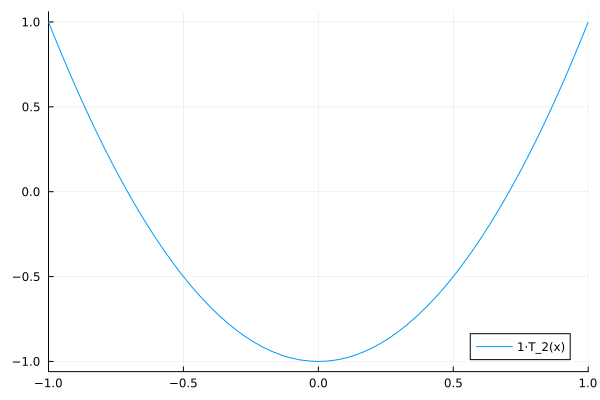

In [22]:
plot(t2)

In [23]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [24]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [25]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [26]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [27]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [28]:
using TaylorSeries

In [29]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [30]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [31]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [32]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [33]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [34]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. **(1pkt)** Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. **(2 pkt)** Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). 
    
    Do analizy danych można użyć wybranego narzędzia (Julia, R)
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 


3. **(1 pkt)** Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. **(1 pkt)** Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. 

5. **(1 pkt)** Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ 


#### Zadanie 1

In [35]:
using DataFrames
using Statistics
using CSV

In [36]:
df = DataFrame(length = Int64[], 
    type = String[],
    time = Float64[])

Row,length,type,time
,Int64,String,Float64


In [37]:
for j = 1:1:10
    for size = 50:50:1000
        A = rand(size, size)
        B = rand(size, size)
        naive_time = @elapsed naive_multiplication(A,B)
        better_time = @elapsed better_multiplication(A,B)
        blas_time = @elapsed A*B
        push!(df, [size, "naive", naive_time])
        push!(df, [size, "better", better_time])
        push!(df, [size, "blas", blas_time])
    end
end

In [38]:
df

Row,length,type,time
,Int64,String,Float64
1,50,naive,0.000472584
2,50,better,7.4959e-5
3,50,blas,1.8666e-5
4,100,naive,0.00349088
5,100,better,0.000563833
6,100,blas,0.000118875
7,150,naive,0.0124316
8,150,better,0.00214363
9,150,blas,0.000108041


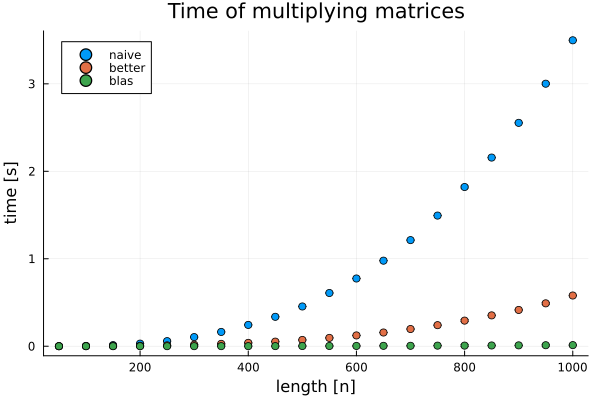

In [39]:
df_grouped = groupby(df, [:length, :type])
df_plot = combine(df_grouped, "time" => mean, "time" => std)
scatter([ df_plot[df_plot[:,2] .== "naive", :].length df_plot[df_plot[:,2] .== "better", :].length df_plot[df_plot[:,2] .== "blas", :].length],
    [ df_plot[df_plot[:,2] .== "naive", :].time_mean  df_plot[df_plot[:,2] .== "better", :].time_mean df_plot[df_plot[:,2] .== "blas", :].time_mean ],
    yerr = df_plot[:, :time_std],
    label = [ "naive" "better" "blas"],
    title = "Time of multiplying matrices",
    xlab = "length [n]",
    ylab = "time [s]"
)

#### Zadanie 2

kod w C:

```
#include <stdio.h>
#include <stdlib.h>
#include <gsl/gsl_sf_bessel.h>
#include <gsl/gsl_blas.h>
#include <sys/times.h>
#include <unistd.h>
#include <fcntl.h>
#include <time.h>

#define START_SIZE 100
#define MAX_SIZE 1000
#define STEP 50


double get_time()
{
    return (double)clock() / CLOCKS_PER_SEC;
}
void generate_line(int size, double time1, double time2, double time3)
{
    FILE *report = fopen("c_results.csv", "a");
    fprintf(report, "%d,%f,%f,%f\n", size, time1, time2, time3);
    fclose(report);
}

void naive_multiplication(double **A, double **B, double **C, int size)
{
    for (int i = 0; i < size; i++)
    {
        for (int j = 0; j < size; j++)
        {
            for (int k = 0; k < size; k++)
            {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}
void better_multiplication(double **A, double **B, double **C, int size)
{
    for (int i = 0; i < size; i++)
    {
        for (int k = 0; k < size; k++)
        {
            for (int j = 0; j < size; j++)
            {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}
void blas_multiplication(double *a, double *b, double *c, int rows)
{
    gsl_matrix_view D = gsl_matrix_view_array(a, rows, rows);
    gsl_matrix_view E = gsl_matrix_view_array(b, rows, rows);
    gsl_matrix_view F = gsl_matrix_view_array(c, rows, rows);
    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans,
                   1.0, &D.matrix, &E.matrix,
                   0.0, &F.matrix);
}

void declare_matrix(double ***A, double ***B, double ***C, double **a, double **b, double **c, int size)
{
    (*A) = calloc(size, sizeof(double *));
    (*B) = calloc(size, sizeof(double *));
    (*C) = calloc(size, sizeof(double *));
    (*a) = calloc(size * size, sizeof(double));
    (*b) = calloc(size * size, sizeof(double));
    (*c) = calloc(size * size, sizeof(double));
    for (int i = 0; i < size; i++)
    {
        (*A)[i] = calloc(size, sizeof(double));
        (*B)[i] = calloc(size, sizeof(double));
        (*C)[i] = calloc(size, sizeof(double));
    }
    for (int i = 0; i < size; i++)
    {
        for (int j = 0; j < size; j++)
        {
            (*A)[i][j] = rand() % 10;
            (*B)[i][j] = rand() % 10;
            (*a)[i*10 + j] = rand() % 10;
            (*b)[i*10 + j] = rand() % 10;
        }
    }
}

void free_matrix(double ***A, double ***B, double ***C, double **a, double **b, double **c, int size){
    for (int i = 0; i < size; i++){
        free((*A)[i]);
        free((*B)[i]);
        free((*C)[i]);
    }
    free((*A));
    free((*B));
    free((*C));
    free((*a));
    free((*b));
    free((*c));
}

void test()
{
    double **A, **B, **C;
    double *a, *b, *c;
    double time1, time2, time3;
    for (int i = START_SIZE; i < MAX_SIZE; i += STEP)
    {
        declare_matrix(&A, &B, &C, &a, &b, &c, i);
        double start, end;
        start = get_time();
        naive_multiplication(A, B, C, i);
        end = get_time();
        time1 = end - start;

        start = get_time();
        better_multiplication(A, B, C, i);
        end = get_time();
        time2 = end - start;

        start = get_time();
        blas_multiplication(a, b, c, i);
        end = get_time();
        time3 = end - start;

        generate_line(i, time1, time2, time3);

        free_matrix(&A, &B, &C, &a, &b, &c, i);
    }
}

int main()
{
    test();
    return 0;
}
```

In [40]:
c_df = CSV.read("c_results.csv", delim=",", header=false, DataFrame)
rename!(c_df, [:length, :type, :time])

Row,length,type,time
,Int64,String7,Float64
1,100,naive,0.011205
2,100,better,0.005638
3,100,blas,3.8e-5
4,150,naive,0.01126
5,150,better,0.010045
6,150,blas,9.7e-5
7,200,naive,0.025948
8,200,better,0.025782
9,200,blas,0.000214


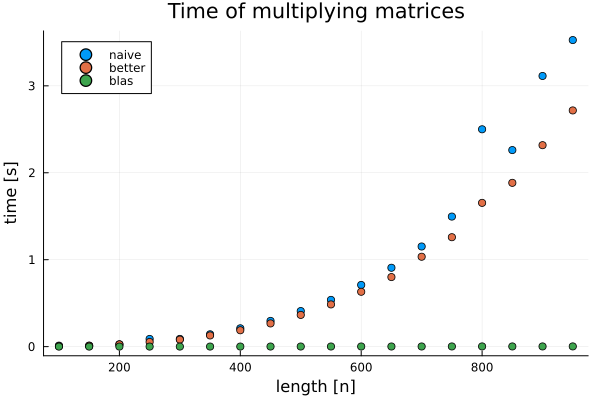

In [41]:
c_df_grouped = groupby(c_df, [:length, :type])
c_df_plot = combine(c_df_grouped, :time => mean, :time => std)
scatter([ c_df_plot[c_df_plot[:,2] .== "naive", :].length c_df_plot[c_df_plot[:,2] .== "better", :].length c_df_plot[c_df_plot[:,2] .== "blas", :].length],
    [ c_df_plot[c_df_plot[:,2] .== "naive", :].time_mean  c_df_plot[c_df_plot[:,2] .== "better", :].time_mean c_df_plot[c_df_plot[:,2] .== "blas", :].time_mean ],
    yerr = c_df_plot[:, :time_std],
    label = [ "naive" "better" "blas"],
    title = "Time of multiplying matrices",
    xlab = "length [n]",
    ylab = "time [s]"
)

#### Zadanie 3

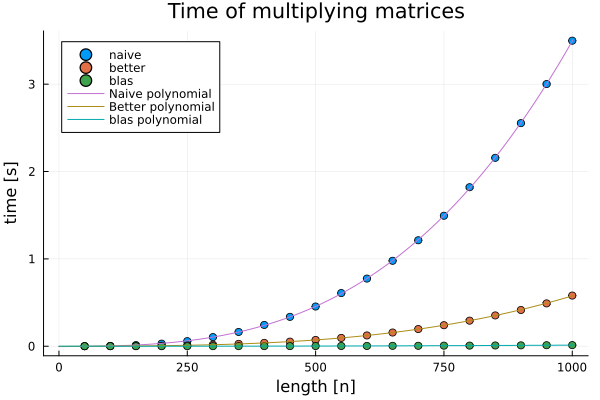

In [42]:
df_blas = df[df.type .== "blas", :]
df_better = df[df.type .== "better", :]
df_naive = df[df.type .== "naive", :]
fit1 = fit(df_naive.length, df_naive.time, 3)
fit2 = fit(df_better.length, df_better.time, 3)
fit3 = fit(df_blas.length, df_blas.time, 2)
xs = 0:1:1001
scatter([ df_plot[df_plot[:,2] .== "naive", :].length df_plot[df_plot[:,2] .== "better", :].length df_plot[df_plot[:,2] .== "blas", :].length],
    [ df_plot[df_plot[:,2] .== "naive", :].time_mean  df_plot[df_plot[:,2] .== "better", :].time_mean df_plot[df_plot[:,2] .== "blas", :].time_mean ],
    yerr = df_plot[:, :time_std],
    label = [ "naive" "better" "blas"],
    title = "Time of multiplying matrices",
    xlab = "length [n]",
    ylab = "time [s]"
)
plot!(fit1, extrema(xs)..., label = "Naive polynomial")
plot!(fit2, extrema(xs)..., label = "Better polynomial")
plot!(fit3, extrema(xs)..., label = "blas polynomial")